#1 Install and Import Libraries

In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Note: you may need to restart the kernel to use updated packages.


#2 Load the Dataset

In [3]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

file_path = '../data/heart_disease.csv'
df = pd.read_csv(file_path, header=None, names=column_names)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#3 Initial Data Exploration

In [4]:
print("--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
df.describe()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB

--- Descriptive Statistics ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


#4 Data Cleaning

In [5]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns with potential missing values to a numeric type
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

# Fill the now-empty (NaN) values with the mean of the column
df['ca'].fillna(df['ca'].mean(), inplace=True)
df['thal'].fillna(df['thal'].mean(), inplace=True)

# Verify that there are no more missing values
print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())


--- Missing Values After Imputation ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\Ahmad Mozaik\AppData\Local\Temp\ipykernel_7464\384322233.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mean(), inplace=True)
C:\Users\Ahmad Mozaik\AppData\Local\Temp\ipykernel_7464\384322233.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

#5 EDA - Vizualization

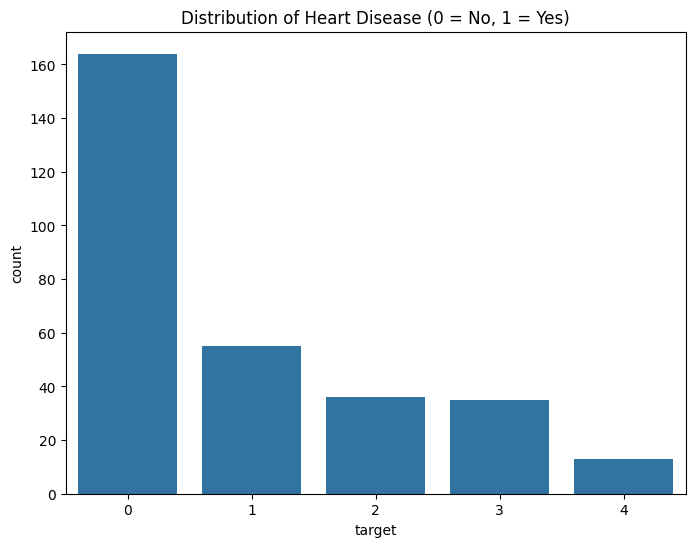

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

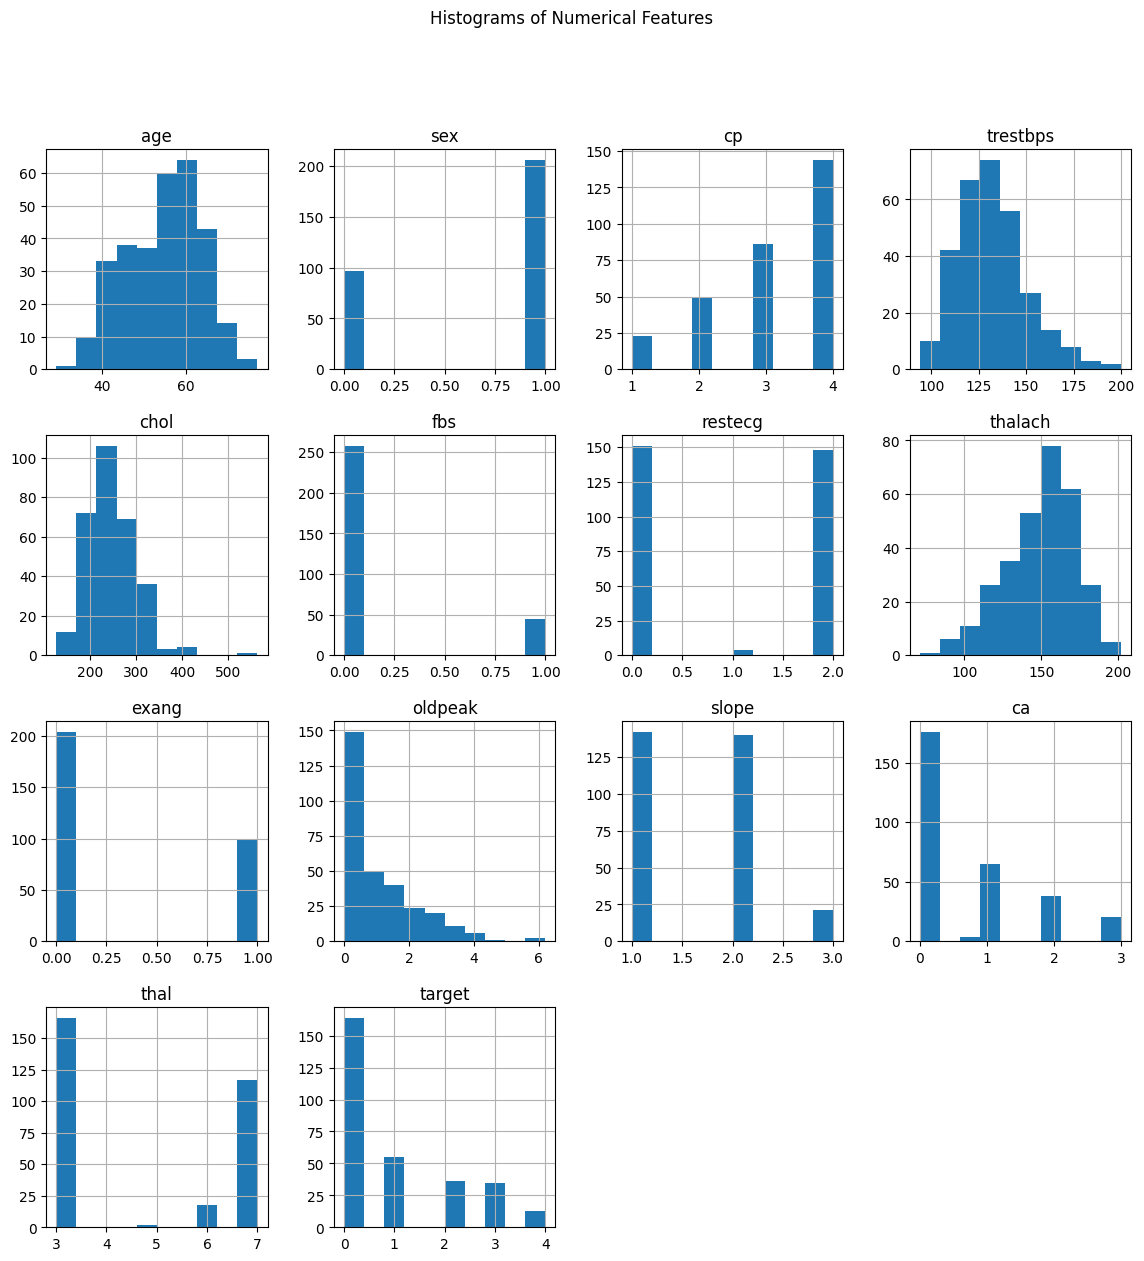

In [7]:
df.hist(figsize=(14, 14))
plt.suptitle('Histograms of Numerical Features')
plt.show()

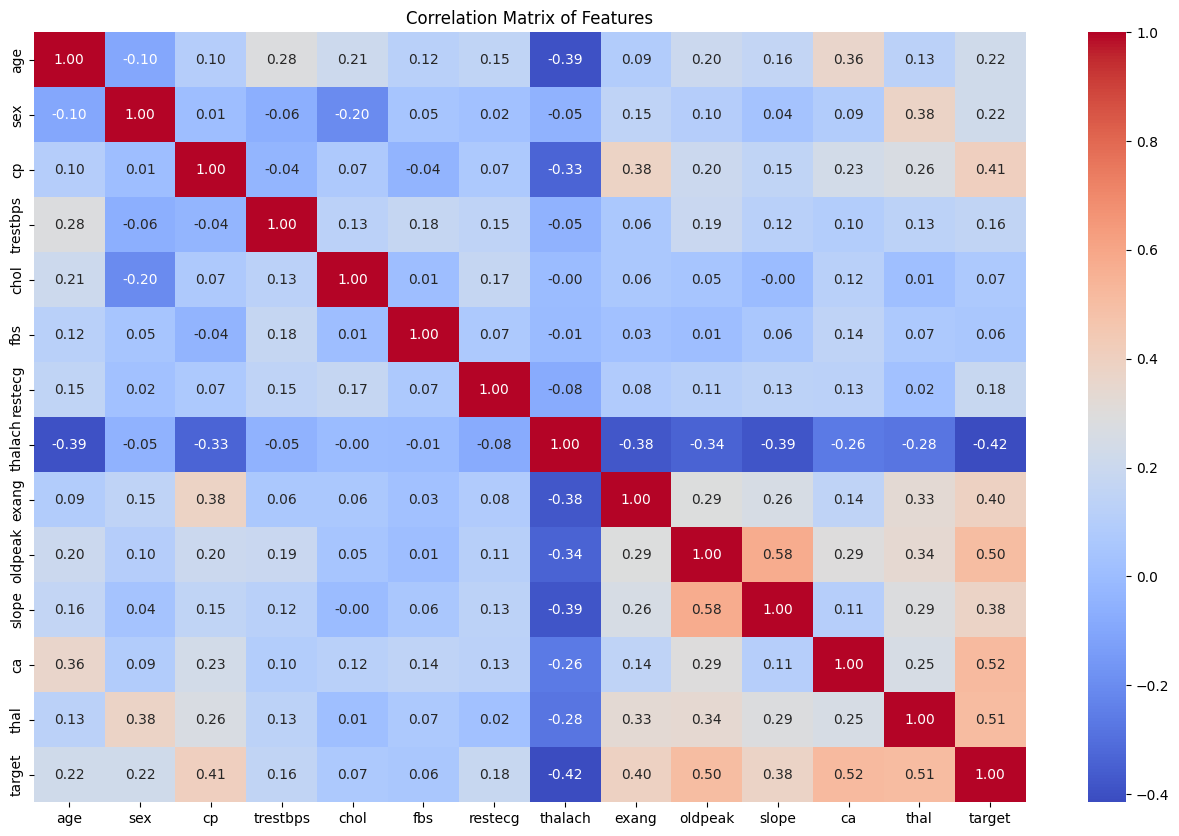

In [8]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

#6 Feature Engineering - One-Hot Encoding

In [9]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n--- Data After One-Hot Encoding ---")
df.head()


--- Data After One-Hot Encoding ---


,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,exang_1.0,slope_2.0,slope_3.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0,thal_4.73421926910299,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,2,True,False,False,True,...,True,True,False,False,False,False,True,False,False,False
2,67.0,120.0,229.0,129.0,2.6,1,True,False,False,True,...,True,True,False,False,False,True,False,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


#7 Feature Scaling

In [10]:
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\n--- Data After Scaling ---")
df.head()

# Add this to the end of your Feature Scaling cell in notebook 01
import joblib
joblib.dump(scaler, '../models/scaler.pkl')
print("Scaler saved successfully.")


--- Data After Scaling ---
Scaler saved successfully.


#8 Save the Cleaned Dataset

In [11]:
output_path = '../data/cleaned_heart_disease.csv'
df.to_csv(output_path, index=False)

print(f"\nPreprocessing complete. Cleaned data saved to: {output_path}")


Preprocessing complete. Cleaned data saved to: ../data/cleaned_heart_disease.csv
